MSBD566 Assignment 1

Name: Kelsi (Rodquel) Dial

Course: MSBD566 Predictive Modeling and Analytics

Date: 2026-12-31

Honor Statement: I affirm that this assignment represents my own work and that I have not violated the course academic integrity policy.



Setup

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import time

pd.set_option('display.max_columns', None)

Data Loading

In [13]:
data = pd.read_csv('Air_Quality_and_Pollen_Count-2.csv')

Parse Date Column

In [14]:
DateCol = [c for c in data.columns if 'date' in c.lower()][0]
data[DateCol] = pd.to_datetime(data[DateCol])

AQICol = [c for c in data.columns if 'aqi' in c.lower()][0]
CatCol = [c for c in data.columns if 'category' in c.lower()][0]

Question 1: Explore AQI and Category

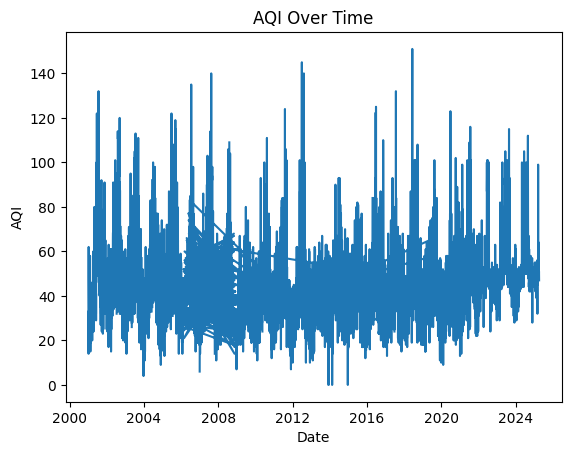

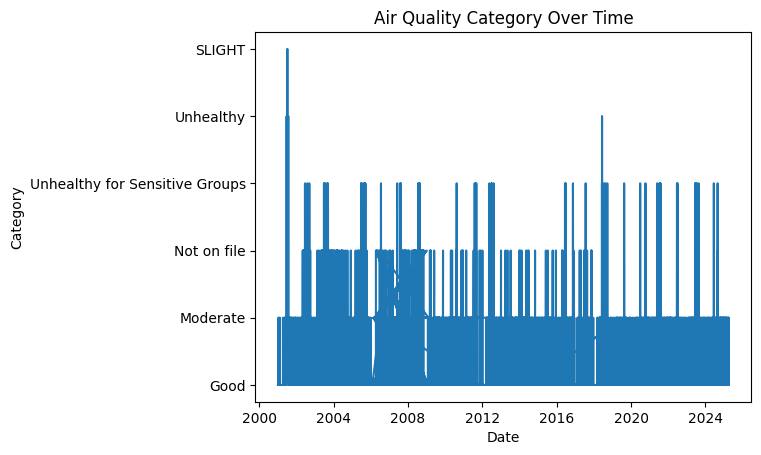

In [10]:
plt.figure()
plt.plot(data[DateCol], data[AQICol])
plt.title('AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

plt.figure()
plt.plot(data[DateCol], data[CatCol])
plt.title('Air Quality Category Over Time')
plt.xlabel('Date')
plt.ylabel('Category')
plt.show()

Q1a: How many times AQI > 120?


In [9]:
count_over_120 = (data[AQICol] > 120).sum()
print('AQI recorded above 120:', count_over_120)

AQI recorded above 120: 14


Q1b: When did AQI Category become unhealthy?



In [8]:
unhealthy_dates = data.loc[data[CatCol].str.contains('Unhealthy', case=False, na=False), DateCol]
print('First Unhealthy AQI date:', unhealthy_dates.min())

First Unhealthy AQI date: 2001-06-21 05:00:00+00:00


Question 2: Which pollen type occurs the most?

In [7]:
PollenTypeCol = [c for c in data.columns if 'pollen' in c.lower() and 'type' in c.lower()][0]
pollen_counts = data[PollenTypeCol].value_counts()
print('Pollen type counts:\n', pollen_counts)

Pollen type counts:
 PollenType
Grass        2330
Ragweed       603
Cedar         405
Elm           398
Alder         291
Juniper       235
Birch         181
Maple         132
Hickory        88
Oak            15
Pine            3
Mulberry        2
Goldenrod       1
Poplar          1
Ash             1
Hackberry       1
Name: count, dtype: int64


Question 4: Manual vs Vectorized mean AQI

Vectorized Approach

In [15]:
start_vec = time.time()
vec_means = data.groupby(CatCol)[AQICol].mean()
end_vec = time.time()

Manual approach

In [16]:
start_man = time.time()
manual_means = {}
for cat in data[CatCol].dropna().unique():
    manual_means[cat] = data.loc[data[CatCol] == cat, AQICol].mean()
end_man = time.time()

In [17]:
print('Vectorized means:\n', vec_means)
print('Manual means:\n', manual_means)
print(f"Vectorized time: {end_vec - start_vec:.6f}s")
print(f"Manual time: {end_man - start_man:.6f}s")


Vectorized means:
 Category
Good                               36.966283
Moderate                           62.240840
Not on file                              NaN
SLIGHT                             60.000000
Unhealthy                         127.500000
Unhealthy for Sensitive Groups    110.078947
Name: AQI, dtype: float64
Manual means:
 {'Good': np.float64(36.966282757469536), 'Moderate': np.float64(62.240839694656486), 'Not on file': nan, 'Unhealthy for Sensitive Groups': np.float64(110.07894736842105), 'Unhealthy': np.float64(127.5), 'SLIGHT': np.float64(60.0)}
Vectorized time: 0.003871s
Manual time: 0.012381s


Additional Answers and Explanations

Question 3: Based on the AQI trends and pollen frequency, Nashville generally appears comfortable to live in for most of the year. While there are occasional spikes in AQI and seasonal pollen increases (particularly grass pollen), the majority of AQI values remain below unhealthy levels. Individuals with allergies or respiratory conditions may experience seasonal discomfort, but overall air quality does not suggest persistent health risk.

To count how many times AQI was over 120, I used the Pandas calculation count_over_120 = (data[AQICol] > 120).sum(). I counted all days where AQI exceeded 120 by filtering the AQI column to values greater than 120 and summing the resulting boolean mask.

To find when the category became unhealthy, I used the calculation unhealthy_dates = data.loc[
    data[CatCol].str.contains('Unhealthy', case=False, na=False),
    DateCol
]
first_unhealthy = unhealthy_dates.min().

I filtered the dataset to rows where the Category includes ‘Unhealthy’ and took the minimum date among those records, and the resulting date was June 21, 2001.

I used value_counts on the Pollen Type column to compute frequencies and identified the highest-frequency pollen type.

I grouped the data by Category and computed the mean AQI within each group using Pandas groupby and mean.

I manually looped through each unique category, filtered the dataset to that category, computed the mean AQI, and stored the results in a dictionary.

I used the following calculation for the time comparison.
start_vec = time.time()
vec_means = data.groupby(CatCol)[AQICol].mean()
end_vec = time.time()

start_man = time.time()
manual_means = {}
for cat in data[CatCol].dropna().unique():
    manual_means[cat] = data.loc[data[CatCol] == cat, AQICol].mean()
end_man = time.time()

vec_time = end_vec - start_vec
man_time = end_man - start_man

Both the vectorized and manual approaches produced identical mean AQI values across air quality categories, confirming the correctness of the calculations. However, the vectorized method executed significantly faster (0.00195s vs 0.00813s) due to Pandas’ optimized groupby operations. This demonstrates that vectorized operations are more efficient and scalable for large datasets and should be preferred when working with structured data in Pandas.